<a href="https://colab.research.google.com/github/jacobazevedojr/CECS-451-Assignment4/blob/main/nAirports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
def solve(airports, cities, alpha):
  notSolved = True

  objChart = []

  citySets = citiesToSets(airports, cities)
  lastObjVal = getObjective(airports, citySets)
  objChart.append(lastObjVal)

  # When do we leave the loop? I propose we choose an arbitrary percent change
  # value to dictate when we have sufficiently reached the solution
  while notSolved:
    # Move to the next acceptable position (according to gradient)
    move(airports, nextStep(airports, citySets), alpha)

    # Break all current cities into sets (for objEval)
    citySets = citiesToSets(airports, cities)
    objVal = getObjective(airports, citySets)
    objChart.append(objVal)

    # Calculates percent change in the lastObjVal
    # lastObjVal should always be less than the current objVal
    delta = (lastObjVal - objVal) / lastObjVal

    # Evaluating condition for acceptable solution
    if delta < .00005:
      notSolved = False

    lastObjVal = objVal

  return objChart

In [73]:
# Returns the value for the corresponding objective function

def getObjective(airports, citySets):
  OVal = 0
  for i, airport in enumerate(airports):
    # citySets[i] will return the set of cities tied to airports[i]
    for j, city in enumerate(citySets[i]):
      # Sum(Sum(x_i - x_c)^2 + (y_i - y_c)^2)
      OVal += (pow(airport[0] - city[0], 2) + pow(airport[1] - city[1], 2))

  return OVal

In [74]:
# Returns an array of partial derivative length = len(airports) * 2, (for x, y)

def nextStep(airports, citySets):
  gradient = []
  xGrad = 0
  yGrad = 0
  for i, airport in enumerate(airports):
    for j, city in enumerate(citySets[i]):
      xGrad += 2 * (airport[0] - city[0])
      yGrad += 2 * (airport[1] - city[1])
    gradient.append(xGrad)
    gradient.append(yGrad)

  return gradient

In [75]:
# Moves the airports based on gradient values

def move(airports, gradient, alpha):

  # counter for gradients
  j = 0
  for i in range(len(airports)):
    x = airports[i][0] - alpha * gradient[j]
    y = airports[i][1] - alpha * gradient[j + 1]
    airports[i] = (x, y)
    j += 2

In [76]:

# Returns a collections of sets, each set corresponding to the cities
# neighboring one of the airports 
# (if a city is within an airport's city set, it is closest to that airport)

def citiesToSets(airports, cities):
  # A list of city sets of coordinate tuples
  citySets = []
  for i in range(len(airports)):
    citySets.append([])

  # Iterates across each city
  for j, city in enumerate(cities):
    # Each city is then evaluated with each airport, the closest airport
    # is the set that the city joins
    citySets[closestAirport(airports, city)].append(city)
  
  return citySets

In [77]:
# Returns the index of the airport that the current city is closest to

def closestAirport(airports, city):
  oldMin = (math.sqrt(pow((airports[0][0] - city[0]), 2) + pow((airports[0][1] - city[1]), 2)), 0)
  for i in range(1, len(airports)):
    newMin = (math.sqrt(pow((airports[i][0] - city[0]), 2) + pow((airports[i][1] - city[1]), 2)), i)
    if (newMin[0] < oldMin[0]):
      oldMin = newMin
  
  return oldMin[1]

120


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

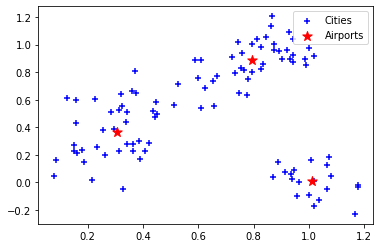

In [78]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

alpha = .001
# The objective chart contains all iterated values for the objective function
objectiveChart = solve(airports, cities, alpha)

print(len(objectiveChart))

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt